In [1]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os
import io

In [2]:
import os
from google.colab import files

rating1 = files.upload()
place1 = files.upload()
user1 = files.upload()

Saving tourism_rating.csv to tourism_rating.csv


Saving tourism_with_id.csv to tourism_with_id.csv


Saving user.csv to user.csv


In [3]:
rating = pd.read_csv(io.StringIO(rating1['tourism_rating.csv'].decode('utf-8')))
print(rating)

      User_Id  Place_Id  Place_Ratings
0           1       179              3
1           1       344              2
2           1         5              5
3           1       373              3
4           1       101              4
...       ...       ...            ...
9995      300       425              2
9996      300        64              4
9997      300       311              3
9998      300       279              4
9999      300       163              2

[10000 rows x 3 columns]


In [4]:
place = pd.read_csv(io.StringIO(place1['tourism_with_id.csv'].decode('utf-8')))
print(place)

     Place_Id                                 Place_Name  \
0           1                           Monumen Nasional   
1           2                                   Kota Tua   
2           3                              Dunia Fantasi   
3           4          Taman Mini Indonesia Indah (TMII)   
4           5                   Atlantis Water Adventure   
..        ...                                        ...   
432       433                        Museum Mpu Tantular   
433       434                              Taman Bungkul   
434       435           Taman Air Mancur Menari Kenjeran   
435       436               Taman Flora Bratang Surabaya   
436       437  Gereja Perawan Maria Tak Berdosa Surabaya   

                                           Description       Category  \
0    Monumen Nasional atau yang populer disingkat d...         Budaya   
1    Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya   
2    Dunia Fantasi atau disebut juga Dufan adalah t...  Tama

In [5]:
user = pd.read_csv(io.StringIO(user1['user.csv'].decode('utf-8')))
print(user)

     User_Id                     Location  Age
0          1        Semarang, Jawa Tengah   20
1          2           Bekasi, Jawa Barat   21
2          3          Cirebon, Jawa Barat   23
3          4           Bekasi, Jawa Barat   21
4          5    Lampung, Sumatera Selatan   20
..       ...                          ...  ...
295      296    Lampung, Sumatera Selatan   31
296      297  Palembang, Sumatera Selatan   39
297      298            Bogor, Jawa Barat   38
298      299          Sragen, Jawa Tengah   27
299      300         Ponorogo, Jawa Timur   26

[300 rows x 3 columns]


In [6]:
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [7]:
place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [8]:
place = place[place['City']=='Bandung']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984


In [9]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 210 to 333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      124 non-null    int64  
 1   Place_Name    124 non-null    object 
 2   Description   124 non-null    object 
 3   Category      124 non-null    object 
 4   City          124 non-null    object 
 5   Price         124 non-null    int64  
 6   Rating        124 non-null    float64
 7   Time_Minutes  50 non-null     float64
 8   Coordinate    124 non-null    object 
 9   Lat           124 non-null    float64
 10  Long          124 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.6+ KB


In [10]:
place = place.drop('Time_Minutes', axis=1)

In [11]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [13]:
# Merubah data rating (hanya dari Kota Bandung)

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


In [14]:
rating.shape

(2842, 3)

In [15]:
# Melihat data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
# Merubah data user (hanya yang pernah mengunjungi Kota Bandung)

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
260,1,"Semarang, Jawa Tengah",20
1178,2,"Bekasi, Jawa Barat",21
279,3,"Cirebon, Jawa Barat",23
418,4,"Bekasi, Jawa Barat",21
1655,5,"Lampung, Sumatera Selatan",20


In [17]:
user.shape

(300, 3)

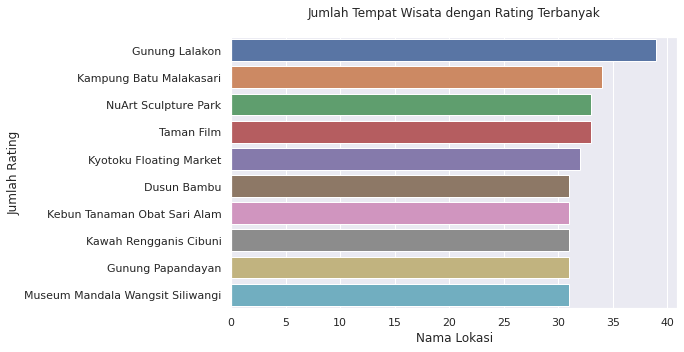

In [18]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

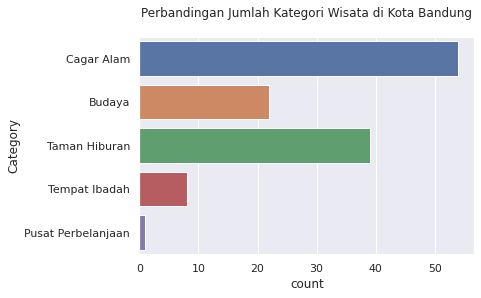

In [19]:
# Membuat visualisasi jumlah kategori wisata di Kota Bandung

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

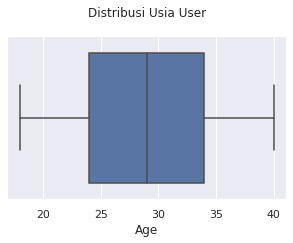

In [20]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

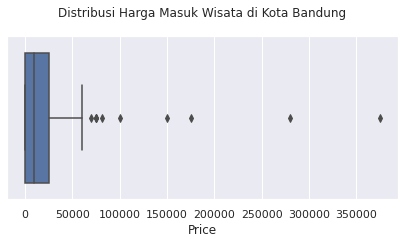

In [21]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

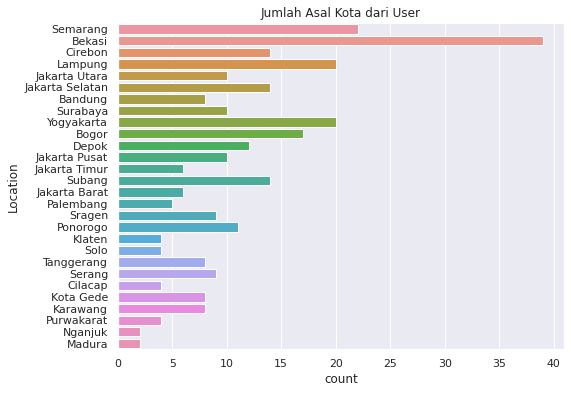

In [22]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

In [23]:
# Membaca dataset untuk dilakukan encoding
 
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


In [24]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [25]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [26]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [27]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 124, Min Rating: 1.0, Max Rating: 5.0


In [28]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42).iloc[:1000,:]
df

,User_Id,Place_Id,Place_Ratings,user,place
415,245,228,2.0,56,17
2233,44,309,3.0,45,98
1149,194,260,5.0,205,49
1113,151,259,3.0,52,48
1225,93,264,2.0,229,53
...,...,...,...,...,...
969,268,252,2.0,284,41
2789,175,332,5.0,295,121
1954,295,296,4.0,289,85
629,190,238,4.0,156,27


In [29]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=.8, random_state=123)

In [30]:
x_train[:,0].shape

(800,)

In [33]:
# creating book embedding path
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense
from tensorflow.keras import Model
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(num_place+1, 50, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Books")(tourism_embedding)
# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(num_users+1, 50, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
# concatenate features
conc = Concatenate()([tourism_vec, user_vec])
# add fully-connected-layers
fc1 = Dense(32, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
#fc3 = Dense(32, activation='relu')(fc2)
out = Dense(1, activation='sigmoid')(fc2)
# Create model and compile it
model2 = Model([user_input, tourism_input], out)
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
history = model2.fit([x_train[:,0],x_train[:,1]], y_train,validation_data = ([x_val[:,0], x_val[:,1]], y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 4s 30ms/step - loss: 0.6933 - root_mean_squared_error: 0.3497 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3368
Epoch 2/100
25/25 [==============================] - 0s 17ms/step - loss: 0.6910 - root_mean_squared_error: 0.3480 - val_loss: 0.6928 - val_root_mean_squared_error: 0.3366
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6886 - root_mean_squared_error: 0.3463 - val_loss: 0.6927 - val_root_mean_squared_error: 0.3365
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6850 - root_mean_squared_error: 0.3437 - val_loss: 0.6923 - val_root_mean_squared_error: 0.3362
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6786 - root_mean_squared_error: 0.3390 - val_loss: 0.6923 - val_root_mean_squared_error: 0.3361
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6671 - root_mean_squared_error: 0.3305 - val_loss: 0.6930 - val_r

In [35]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tourism-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Tourism-Embedding (Embedding)  (None, 1, 50)        6250        ['Tourism-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 50)        15050       ['User-Input[0][0]']             
                                                                                              

In [36]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.places_embedding = layers.Embedding( 
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    places_vector = self.places_embedding(inputs[:, 1]) 
    places_bias = self.places_bias(inputs[:, 1]) 
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) 

In [37]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [39]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.7046 - root_mean_squared_error: 0.3573 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3397
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7034 - root_mean_squared_error: 0.3558 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3398
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7054 - root_mean_squared_error: 0.3578 - val_loss: 0.6968 - val_root_mean_squared_error: 0.3393
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7018 - root_mean_squared_error: 0.3554 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3385
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7014 - root_mean_squared_error: 0.3551 - val_loss: 0.6951 - val_root_mean_squared_error: 0.3381
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7016 - root_mean_squared_error: 0.3552 - val_loss: 0.6948 - val_root_

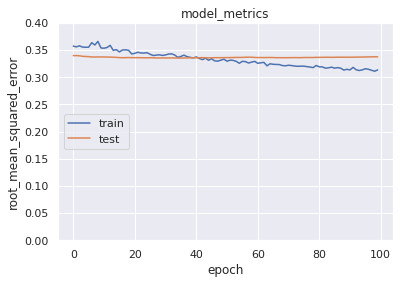

In [40]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [41]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [42]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [43]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [44]:
# Mengambil top 5 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 5,'\n')
print('----' * 5)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 5)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 5)
print('Top 5 place recommendation')
print('----' * 5)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*5)

Daftar rekomendasi untuk: User 250

--------------------
Tempat dengan rating wisata paling tinggi dari user
--------------------
Jalan Braga : Budaya
Kawah Putih : Cagar Alam
Kawasan Punclut : Taman Hiburan
Gunung Papandayan : Cagar Alam
Lawangwangi Creative Space : Taman Hiburan

--------------------
Top 5 place recommendation
--------------------
1 . GunungTangkuban perahu 
     Cagar Alam , Harga Tiket Masuk  30000 , Rating Wisata  4.5 

2 . Trans Studio Bandung 
     Taman Hiburan , Harga Tiket Masuk  280000 , Rating Wisata  4.5 

3 . Dusun Bambu 
     Taman Hiburan , Harga Tiket Masuk  25000 , Rating Wisata  4.5 

4 . Dago Dreampark 
     Taman Hiburan , Harga Tiket Masuk  40000 , Rating Wisata  4.2 

5 . Stone Garden Citatah 
     Taman Hiburan , Harga Tiket Masuk  30000 , Rating Wisata  4.4 



In [48]:
model2.evaluate([x_train[:,0],x_train[:,1]], y_train)

25/25 [==============================] - 1s 8ms/step - loss: 0.3782 - root_mean_squared_error: 0.0430


[0.37820544838905334, 0.04303490370512009]

In [53]:
model2.save('recommendation_rating_model2.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [52]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 
import time 
saved_model_path = "/tmp/my_model2.h5"

# YOUR CODE HERE
model2.save(saved_model_path)

In [55]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [56]:
# EXERCISE: Use the tensorflow.js converter to convert the saved Keras model into JSON format.

# YOUR CODE HERE
!tensorflowjs_converter --input_format=keras {saved_model_path} ./